In [3]:
pip install tensorflow opencv python matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [4]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [5]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt;

In [6]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

remove ddodgy images

In [7]:
import cv2
import imghdr

C:\Users\mridu\AppData\Local\Temp\ipykernel_2212\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir='data'
os.listdir(data_dir)

['happy', 'sad']

In [9]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1687d86811a2c25b877448ed47218131.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Senior-citizens-on-holiday-22143350.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'businesswoman-giving-high-five

In [10]:
image_exts=['jpeg','jpg','bmp','png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in exit list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 187 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()
data_iterator


NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000023D29047710>)

In [16]:
batch =data_iterator.next()
len(batch)

2

In [21]:
batch[0].shape

(32, 256, 256, 3)

In [22]:
#1 ->sad 0->happy
batch[1]

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0])

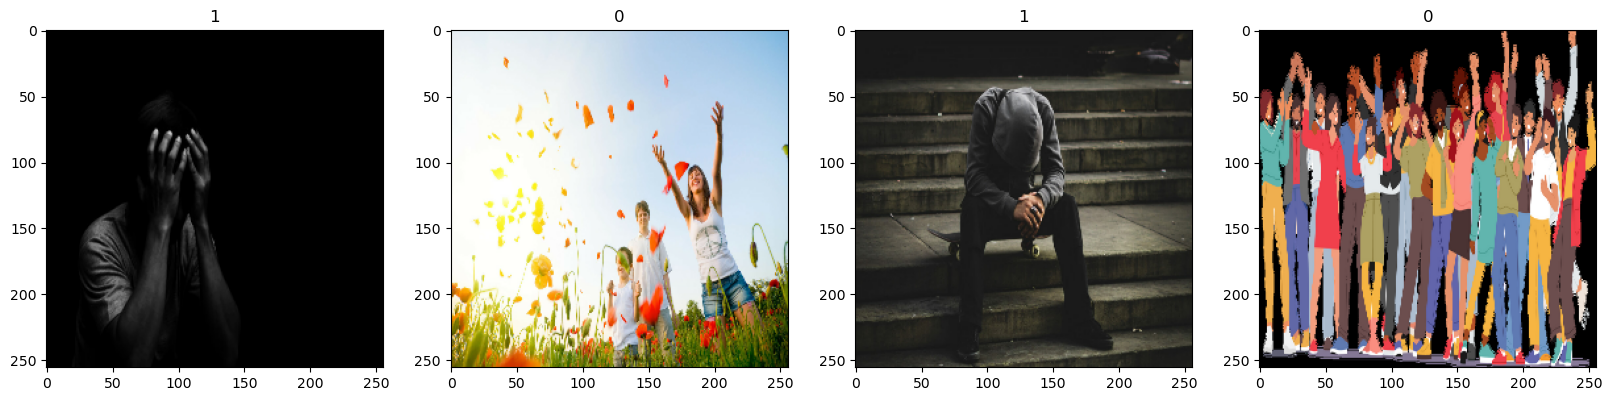

In [23]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

preprocess data

scale data

In [24]:
data = data.map(lambda x,y: (x/255,y)) #x=images y= labels

In [25]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

In [30]:
batch[0].min()


0.0

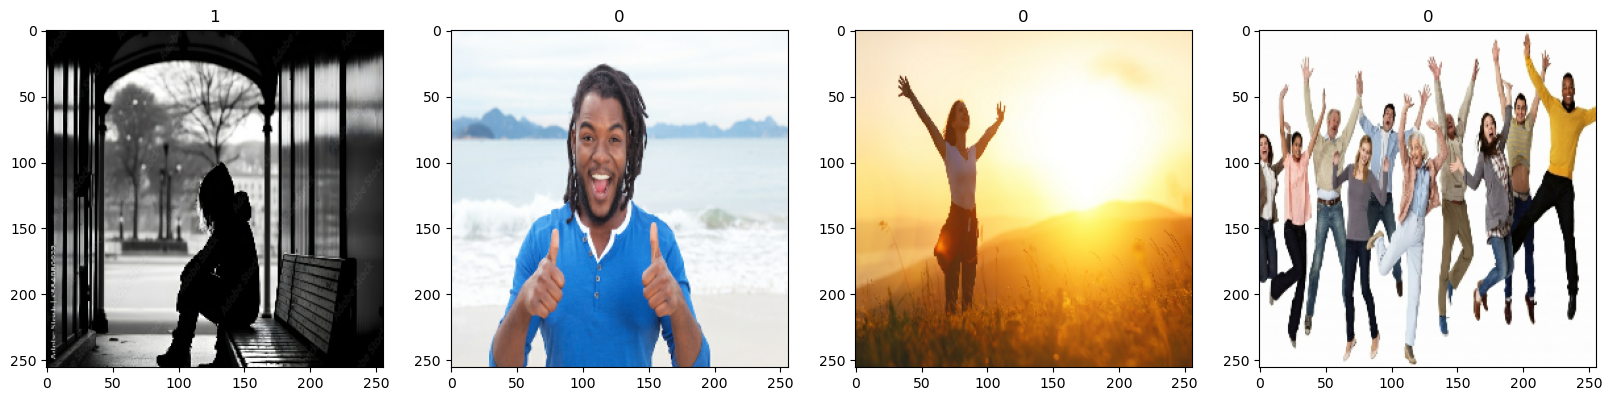

In [29]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [44]:
#split data
len(data)

6

In [47]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [48]:
val_size

1

In [49]:
train_size+val_size+test_size

6

In [50]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [53]:
len(val)

1

deep model

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First layer
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

# Second layer
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

# Third layer
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D())

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
logdir='logs'

In [66]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6458 - loss: 2.1390 - val_accuracy: 0.4375 - val_loss: 1.7159
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3740 - loss: 1.5203 - val_accuracy: 0.4688 - val_loss: 0.6778
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4750 - loss: 0.6839 - val_accuracy: 0.6250 - val_loss: 0.6712
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6313 - loss: 0.6749 - val_accuracy: 0.6875 - val_loss: 0.6819
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8042 - loss: 0.6728 - val_accuracy: 0.7500 - val_loss: 0.6580
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7167 - loss: 0.6460 - val_accuracy: 0.7500 - val_loss: 0.5812
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7031 - loss: 0.5798 - val_accuracy: 0.6250 - val_loss: 0.5682
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7073 - loss: 0.5379 - val_accuracy: 0.8750 - val_loss: 0.3456
Epoch 9/20
4/4 

In [69]:
hist.history

{'accuracy': [0.59375,
  0.390625,
  0.5078125,
  0.640625,
  0.8125,
  0.71875,
  0.71875,
  0.7265625,
  0.8359375,
  0.8515625,
  0.8359375,
  0.890625,
  0.9296875,
  0.9296875,
  0.9453125,
  0.9765625,
  0.9921875,
  0.984375,
  1.0,
  1.0],
 'loss': [2.3121824264526367,
  1.2580541372299194,
  0.6815835237503052,
  0.6770384311676025,
  0.6696074604988098,
  0.6410293579101562,
  0.5593047738075256,
  0.5141547918319702,
  0.4168519377708435,
  0.34738343954086304,
  0.33299124240875244,
  0.2356870323419571,
  0.20080962777137756,
  0.1525276005268097,
  0.12306956946849823,
  0.0839562863111496,
  0.08443229645490646,
  0.05880381911993027,
  0.024862397462129593,
  0.018211115151643753],
 'val_accuracy': [0.4375,
  0.46875,
  0.625,
  0.6875,
  0.75,
  0.75,
  0.625,
  0.875,
  0.875,
  0.875,
  0.90625,
  0.96875,
  0.96875,
  0.96875,
  0.96875,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.7159287929534912,
  0.6778098344802856,
  0.6711909770965576,
  0.68187278

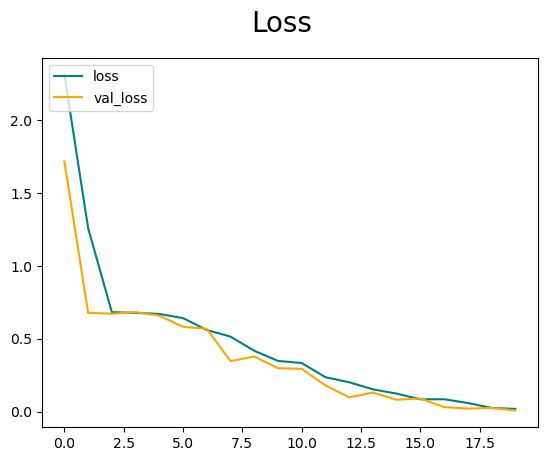

In [70]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

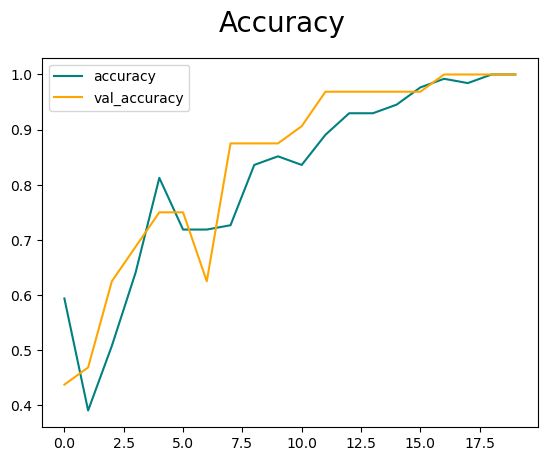

In [71]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

evaluate performance

In [72]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [73]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


In [76]:
print (f'Precision : {pre.result().numpy()} , Recall : {re.result().numpy()} Accuarcy : {acc.result().numpy()}')

Precision : 1.0 , Recall : 1.0 Accuarcy : 1.0


In [77]:
import cv2

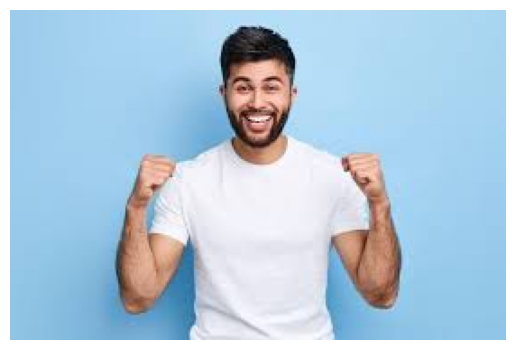

In [91]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('happytest.jpg')
if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # This hides the axes
    plt.show()


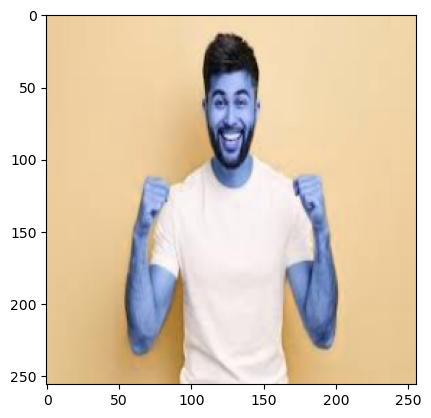

In [93]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [97]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [98]:
yhat

array([[0.00982265]], dtype=float32)

In [99]:
if yhat>0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is Happy')

predicted class is Happy


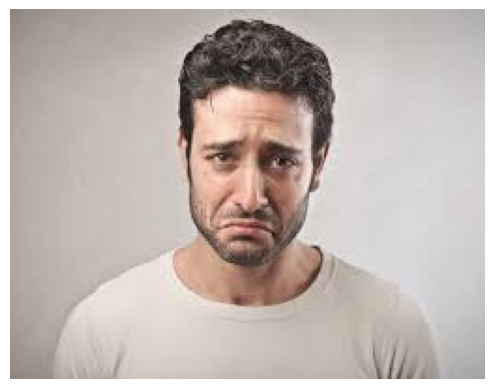

In [100]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('sadtest.jpg')
if img is None:
    print("Error: Image not found or cannot be loaded.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # This hides the axes
    plt.show()


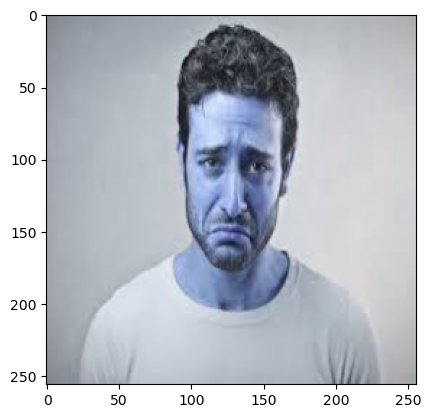

In [101]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
yhat = model.predict(np.expand_dims(resize/255,0))
if yhat>0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
predicted class is Sad


In [103]:
from tensorflow.keras.models import load_model

In [104]:
model.save(os.path.join('models','happy_sadmodel.h5'))

In [105]:
new_model=load_model(os.path.join('models','happy_sadmodel.h5'))

In [109]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [110]:
if yhatnew>0.5:
    print(f'predicted class is Sad')
else:
    print(f'predicted class is Happy')

predicted class is Sad
